In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import seaborn as sns

pd.options.display.float_format = '{:,.2f}'.format
%matplotlib inline

print(sys.version)
print(pd.__version__)
print(np.__version__)

import io
import os
import pandas as pd
pd.set_option("display.max_rows", 1000)
pd.options.display.max_colwidth = 1000

3.9.13 (main, Aug 25 2022, 18:29:29) 
[Clang 12.0.0 ]
1.4.4
1.21.5


---

## 4: Clinical disease data (40 pts)

Your boss comes to you Monday morning and says “I figured out our next step; we are going to pivot from an online craft store and become a data center for genetic disease information! I found **ClinVar** which is a repository that contains expert curated data, and it is free for the taking. This is a gold mine! Look at the file and tell me what gene and mutation combinations are classified as dangerous.”

Make sure that you only give your boss the dangerous mutations and include:

1) Gene name

2) Mutation ID number

3) Mutation Position (chromosome & position)

4) Mutation value (reference & alternate bases)

5) Clinical significance (CLNSIG)

6) Disease that is implicated

**Requirements**

1) The deliverables are the final result as a dataframe with a short discussion of any specifics. (that is, what data you would present to your boss with the explanation of your results)

2) Limit your output to the first 100 harmful mutations and tell your boss how many total harmful mutations were found in the file

3) Use the instructor-modified "clinvar_final.txt" at this link: https://drive.google.com/file/d/1Zps0YssoJbZHrn6iLte2RDLlgruhAX1s/view?usp=sharing This file was modified to be not exactly the same as 'standard' .vcf file to test your data parsing skills. **This is a large file so do NOT upload it into your github repo!**

4) Replace missing values in the dataframe with: 'Not_Given'. Print or display this (including the Not_Given count) for the column `CLNSIG` by using pandas value_counts() function (https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html).

5) State in your answer how you define harmful mutations

**6) Do your best on getting to above requirements and submit whatever you do before the deadline. If your work is incomplete be sure to describe the blockers that got in your way and how you might get past them (if given more time).**

7) You can use as many code blocks as you need. Please clean-up your code and make it readable for the graders!

**Hints** 
* We do not expect you to have any medical knowledge to solve this problem; look at the data, read the documentation provided, and write down your assumptions!

* Correct pseudocode will give you partial credit so start with that. 

* Map out which fields you want to extract: Are they in the same place every time? What strategy will you use to robustly extract and filter your data of interest? How do you plan to handle missing data?

* A good way to start is to print out each line, then practice parsing them to see if you can recover the fields of interest

* A starting solution for parsing .vcfs can be found here: https://gist.github.com/dceoy/99d976a2c01e7f0ba1c813778f9db744 This solution does **NOT** work due to the changes we've made but can be modified to work. As with any solution that needs modifications, it may take less time to make your own solution!

* Filter out junk and lines with no mutation data. Just focus on the data your need to deliver to your boss. 

* Pandas and NumPy parsers correctly recognize the end of each line in in the ClinVar file.

* The unit of observation of this dataset is one row per mutation.

* This is similar to a task that one of us tackled at work. You can answer the question with the information provided below or using the (partial) data dictionary file at this link: https://drive.google.com/file/d/1lx9yHdlcqmU_OlHiTUXKC_LQDqYBypH_/view?usp=sharing. Our goal is to see that you can put together a sensible plan, implement a solid parsing strategy, and document and justify the decisions that you made.

### VCF file description (Summarized from version 4.1)

```
* The VCF specification:

VCF is a text file format which contains meta-information lines, a header line, and then data lines each containing information about a position in the genome. The format also can contain genotype information on samples for each position.

* Fixed fields:

There are 8 fixed fields per record. All data lines are **tab-delimited**. In all cases, missing values are specified with a dot (‘.’). 

1. CHROM - chromosome number
2. POS - position DNA nuceleotide count (bases) along the chromosome
3. ID - The unique identifier for each mutation
4. REF - reference base(s)
5. ALT - alternate base(s)
6. FILTER - filter status
7. QUAL - quality
8. INFO - a semicolon-separated series of keys with values in the format: <key>=<data>

```
### Applicable INFO field specifications

```
GENEINFO = <Gene name>
CLNSIG =  <Clinical significance>
CLNDN = <Disease name>
```

### Sample ClinVar data (vcf file format - not exactly the same as the file to download!)

```
##fileformat=VCFv4.1
##fileDate=2019-03-19
##source=ClinVar
##reference=GRCh38							
#CHROM	POS	ID	REF	ALT	QUAL	FILTER	INFO
1	949523	rs786201005	C	T	.	.	GENEINFO=ISG15;CLNSIG=5
1	949696	rs672601345	C	CG	.	.	GENEINFO=ISG15;CLNSIG=5;CLNDN=Cancer
1	949739	rs672601312	G	T	.	.	GENEINFO=ISG15;CLNDBN=Cancer
1	955597	rs115173026	G	T	.	.	GENEINFO=AGRN;CLNSIG=2; CLNDN=Cancer
1	955619	rs201073369	G	C	.	.	GENEINFO=AGG;CLNDN=Heart_dis 
1	957640	rs6657048	C	T	.	.	GENEINFO=AGG;CLNSIG=3;CLNDN=Heart_dis 
1	976059	rs544749044	C	T	.	.	GENEINFO=AGG;CLNSIG=0;CLNDN=Heart_dis 
```

In [2]:
# 4) Your code here - can use as many code blocks as you would like

4) Please Write your assumptions here:

4) Findings / What would you present to your boss?

----

In [3]:
def read_vcf(path):
    with open(path, 'r') as f:
        lines = [l for l in f if not l.startswith('##')]
    return pd.read_csv(
        io.StringIO(''.join(lines)),
        dtype={'#CHROM': str, 'POS': int, 'ID': str, 'REF': str, 'ALT': str,
               'QUAL': str, 'FILTER': str, 'INFO': str},
        sep='\t'
    ).rename(columns={'#CHROM': 'CHROM'})

----

# <font color = teal> Explore Raw Data

## Import Data

In [3]:
df=pd.read_table('../clinvar_final.txt', sep='\t',skiprows=(27), header=(0))

In [4]:
df.head(5)

,CHROM,POS,ID,REF,ALT,FILTER,QUAL,INFO
0,1,1014O42,475283,G,A,.,.,AF_ESP=0.00546;AF_EXAC=0.00165;AF_TGP=0.00619;...
1,1,1O14122,542074,C,T,.,.,AF_ESP=0.00015;AF_EXAC=0.00010;ALLELEID=514926...
2,1,1014143,183381,C,T,.,.,"ALLELEID=181485;CLNDISDB=MedGen:C4015293,OMIM:..."
3,1,1014179,542075,C,T,.,.,"ALLELEID=514896;CLNDISDB=MedGen:C4015293,OMIM:..."
4,1,1014217,475278,C,T,.,.,AF_ESP=0.00515;AF_EXAC=0.00831;AF_TGP=0.00339;...


In [16]:
df.shape

(102321, 8)

In [23]:
df.columns

Index(['CHROM', 'POS', 'ID', 'REF', 'ALT', 'FILTER', 'QUAL', 'INFO'], dtype='object')

In [24]:
df.count()

CHROM     102321
POS       102321
ID        102321
REF       102321
ALT       102321
FILTER    102321
QUAL      102321
INFO      102321
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102321 entries, 0 to 102320
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   CHROM   102321 non-null  int64 
 1   POS     102321 non-null  object
 2   ID      102321 non-null  int64 
 3   REF     102321 non-null  object
 4   ALT     102321 non-null  object
 5   FILTER  102321 non-null  object
 6   QUAL    102321 non-null  object
 7   INFO    102321 non-null  object
dtypes: int64(2), object(6)
memory usage: 6.2+ MB


In [17]:
df.describe()

# looks like the count for both matches the shape of the df

,CHROM,ID
count,"102,321.00","102,321.00"
mean,1.88,"340,282.99"
std,0.71,"163,372.00"
min,1.00,20.00
25%,1.00,"216,958.00"
50%,2.00,"342,510.00"
75%,2.00,"479,701.00"
max,3.00,"620,635.00"


## Count null value columns

In [25]:
print('-'*100)
print('Count of null values arranged in descending order')
print('-'*100)
df.isna().sum(axis=0).sort_values(ascending = False)

----------------------------------------------------------------------------------------------------
Count of null values arranged in descending order
----------------------------------------------------------------------------------------------------


CHROM     0
POS       0
ID        0
REF       0
ALT       0
FILTER    0
QUAL      0
INFO      0
dtype: int64

    Appears there are no null values in any column

# Understand Documentation for Columns

In [67]:
# each containing information about a position in the genome. The format also has the ability to contain genotype information on samples for each position.

# allele : one of two or more alternative forms of a gene that arise by mutation and are found at the same place on a chromosome.

# Genotype data are given for three samples, two of which are phased and the third unphased, with per sample genotype quality, 
    #depth and haplotype qualities (the latter only for the phased samples) given as well as the genotypes. The microsatellite calls are unphased.

## Types

### <font color = red> (1) Two alternate alleles

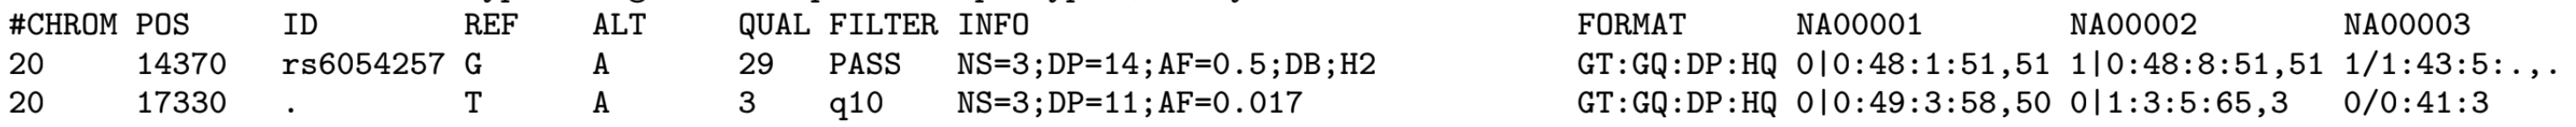

In [62]:
# with one of them (T) being ancestral (possibly a reference sequencing error),

---

### <font color = red>  (2) Monomorphic reference

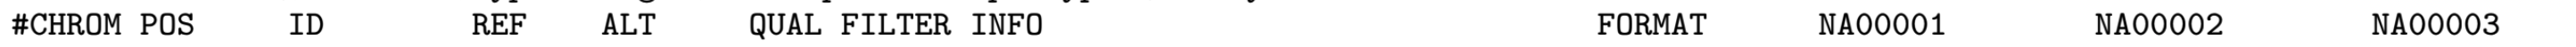
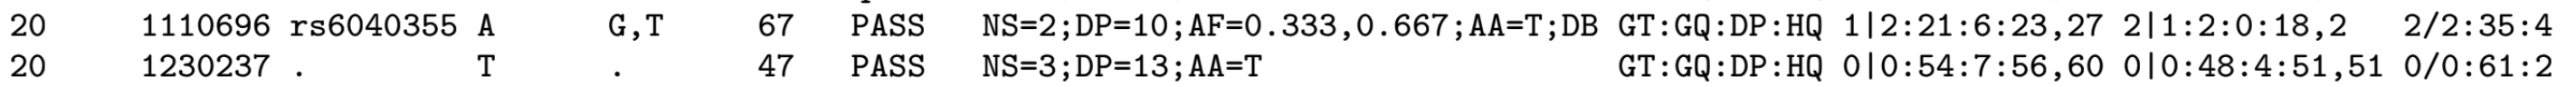

In [64]:
# (i.e. with no alternate alleles),

---

### <font color = red> (3) Microsatellite

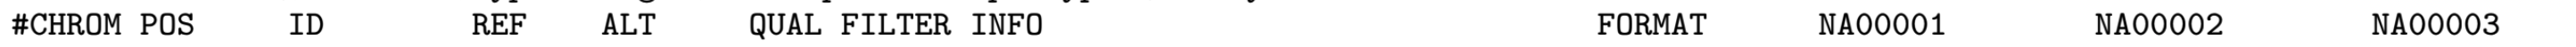
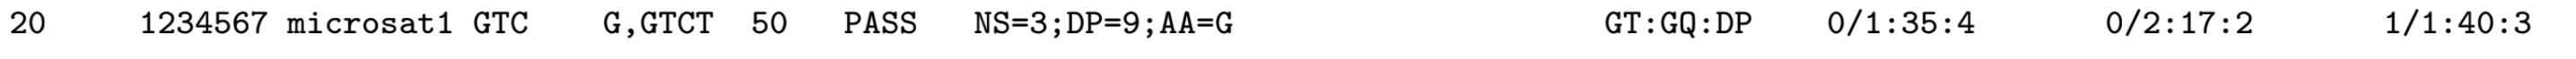

In [65]:
# with two alternative alleles, one a deletion of 2 bases (TC), and the other an insertion of one base (T).

---

---

# <font color = teal> Explore Columns

## <font color = blue> CHROM

In [32]:
df['CHROM'].describe

# now sure what this is useful for. Values are 1, 2, 3

<bound method NDFrame.describe of 0         1
1         1
2         1
3         1
4         1
         ..
102316    3
102317    3
102318    3
102319    3
102320    3
Name: CHROM, Length: 102321, dtype: int64>

In [42]:
df.tail(10)

# Clarifies what CHROM dtype is (it is integer 3)

,CHROM,POS,ID,REF,ALT,FILTER,QUAL,INFO
102311,3,179210292,45465,AAGATTTGCTGAACCC,A,.,.,ALLELEID=54632;CLNDISDB=Human_Phenotype_Ontolo...
102312,3,179210293,376472,A,T,.,.,ALLELEID=363351;CLNDISDB=Human_Phenotype_Ontol...
102313,3,179210318,584654,A,G,.,.,"ALLELEID=575696;CLNDISDB=MedGen:C0027672,SNOME..."
102314,3,179210438,376359,C,T,.,.,ALLELEID=363238;CLNDISDB=MedGen:C0302182;CLNDN...
102315,3,179210475,412645,G,C,.,.,AF_EXAC=0.00007;ALLELEID=393605;CLNDISDB=MedGe...
102316,3,179210507,403908,A,G,.,.,"ALLELEID=393412;CLNDISDB=MedGen:C0018553,Orpha..."
102317,3,179210511,526648,T,C,.,.,"ALLELEID=519163;CLNDISDB=MedGen:C0018553,Orpha..."
102318,3,179210515,526640,A,C,.,.,AF_EXAC=0.00002;ALLELEID=519178;CLNDISDB=MedGe...
102319,3,179210516,246681,A,G,.,.,AF_EXAC=0.00001;ALLELEID=245287;CLNDISDB=MedGe...
102320,3,179210538,259958,A,T,.,.,AF_EXAC=0.00001;ALLELEID=251013;CLNDISDB=MedGe...


In [40]:
df['CHROM'].unique()

# confirms there are only 3 values for CHROM

array([1, 2, 3])

---

## <font color = blue> POS

In [45]:
df.POS.describe()

# there are 95554 unique values (of a total of 102321) -- need to look into duplicates

# the max frequency is 31 -- ie the repetitions

count       102321
unique       95554
top       37025629
freq            31
Name: POS, dtype: object

In [46]:
df['POS'].value_counts().sample(10)

124737895    1
142555928    1
37028828     2
32166975     1
161821081    1
122275829    1
38556428     1
77617785     1
26794814     1
47373892     1
Name: POS, dtype: int64

In [50]:
#df['POS'].value_counts(ascending = False).sample(100)
df['POS'].value_counts(ascending = False).head(30)

# it would be interesting to explore some of these cases

37025629     31
73385903     13
149172318    13
92478757     11
178713381    11
47414420     11
241500602    10
20651801     10
165294040     9
168293284     9
55058666      8
120992007     8
51032510      8
158611131     8
70955832      8
124746755     7
24118973      7
160039373     6
50346870      6
211492048     6
178698916     6
47806285      6
10376834      6
172666616     6
176119435     6
46709583      6
37025608      6
178535858     5
103005900     5
37050632      5
Name: POS, dtype: int64

In [57]:
df[df['POS'] == '37025629']

# this is very interesting -- what is ALT?
# also, these repetitions do not have any filter or qual

,CHROM,POS,ID,REF,ALT,FILTER,QUAL,INFO
87677,3,37025629,36539,T,A,.,.,"AF_EXAC=0.00014;ALLELEID=45201;CLNDISDB=MedGen:C0009405,Orphanet:ORPHA443090|MedGen:C0027672,SNOMED_CT:699346009|MedGen:C1333990,Orphanet:ORPHA144,SNOMED_CT:315058005|MedGen:C1333991,OMIM:609310|MedGen:C2936783,OMIM:120435|MedGen:CN169374;CLNDN=Hereditary_nonpolyposis_colon_cancer|Hereditary_cancer-predisposing_syndrome|Lynch_syndrome|Lynch_syndrome_II|Lynch_syndrome_I|not_specified;CLNHGVS=NC_000003.12:g.37025629T>A;CLNREVSTAT=reviewed_by_expert_panel;CLNSIG=Benign;CLNVC=single_nucleotide_variant;CLNVCSO=SO:0001483;CLNVI=Center_for_Human_Genetics,_Inc:MLH1-A5|International_Society_for_Gastrointestinal_Hereditary_Tumours_(InSiGHT):c.1039-8T>A;GENEINFO=MLH1:4292;MC=SO:0001627|intron_variant;ORIGIN=1;RS=193922367"
87678,3,37025629,140797,T,TA,.,.,"ALLELEID=150511;CLNDISDB=MedGen:C0009405,Orphanet:ORPHA443090|MedGen:C0027672,SNOMED_CT:699346009|MedGen:CN169374;CLNDN=Hereditary_nonpolyposis_colon_cancer|Hereditary_cancer-predisposing_syndrome|not_specified;CLNHGVS=NC_000003.12:g.37025631dupA;CLNREVSTAT=criteria_provided,_multiple_submitters,_no_conflicts;CLNSIG=Benign;CLNVC=Duplication;CLNVCSO=SO:1000035;GENEINFO=MLH1:4292;MC=SO:0001627|intron_variant;ORIGIN=1;RS=1553650466"
87679,3,37025629,182538,T,TTA,.,.,"ALLELEID=180144;CLNDISDB=MedGen:C0009405,Orphanet:ORPHA443090|MedGen:C0027672,SNOMED_CT:699346009;CLNDN=Hereditary_nonpolyposis_colon_cancer|Hereditary_cancer-predisposing_syndrome;CLNHGVS=NC_000003.12:g.37025629_37025630insTA;CLNREVSTAT=criteria_provided,_multiple_submitters,_no_conflicts;CLNSIG=Benign/Likely_benign;CLNVC=Insertion;CLNVCSO=SO:0000667;GENEINFO=MLH1:4292;MC=SO:0001627|intron_variant;ORIGIN=1;RS=535965616"
87680,3,37025629,215443,T,TTTA,.,.,"ALLELEID=212308;CLNDISDB=MedGen:C0009405,Orphanet:ORPHA443090;CLNDN=Hereditary_nonpolyposis_colon_cancer;CLNHGVS=NC_000003.12:g.37025629_37025630insTTA;CLNREVSTAT=criteria_provided,_single_submitter;CLNSIG=Benign;CLNVC=Insertion;CLNVCSO=SO:0000667;GENEINFO=MLH1:4292;MC=SO:0001627|intron_variant;ORIGIN=1;RS=535965616"
87681,3,37025629,215444,T,TTTTA,.,.,"ALLELEID=212309;CLNDISDB=MedGen:C0009405,Orphanet:ORPHA443090;CLNDN=Hereditary_nonpolyposis_colon_cancer;CLNHGVS=NC_000003.12:g.37025629_37025630insTTTA;CLNREVSTAT=criteria_provided,_single_submitter;CLNSIG=Benign;CLNVC=Insertion;CLNVCSO=SO:0000667;GENEINFO=MLH1:4292;MC=SO:0001627|intron_variant;ORIGIN=1;RS=535965616"
87682,3,37025629,215445,T,TTTTTA,.,.,"ALLELEID=212310;CLNDISDB=MedGen:C0009405,Orphanet:ORPHA443090;CLNDN=Hereditary_nonpolyposis_colon_cancer;CLNHGVS=NC_000003.12:g.37025629_37025630insTTTTA;CLNREVSTAT=criteria_provided,_single_submitter;CLNSIG=Benign;CLNVC=Insertion;CLNVCSO=SO:0000667;GENEINFO=MLH1:4292;MC=SO:0001627|intron_variant;ORIGIN=1;RS=535965616"
87683,3,37025629,237302,T,TTTTTAA,.,.,"ALLELEID=239163;CLNDISDB=MedGen:C1333990,Orphanet:ORPHA144,SNOMED_CT:315058005;CLNDN=Lynch_syndrome;CLNHGVS=NC_000003.12:g.37025629_37025630insTTTTAA;CLNREVSTAT=criteria_provided,_single_submitter;CLNSIG=Uncertain_significance;CLNVC=Insertion;CLNVCSO=SO:0000667;GENEINFO=MLH1:4292;MC=SO:0001627|intron_variant;ORIGIN=1;RS=535965616"
87684,3,37025629,215446,T,TTTTTTA,.,.,"ALLELEID=212311;CLNDISDB=MedGen:C0009405,Orphanet:ORPHA443090|MedGen:CN169374;CLNDN=Hereditary_nonpolyposis_colon_cancer|not_specified;CLNHGVS=NC_000003.12:g.37025629_37025630insTTTTTA;CLNREVSTAT=criteria_provided,_multiple_submitters,_no_conflicts;CLNSIG=Benign/Likely_benign;CLNVC=Insertion;CLNVCSO=SO:0000667;GENEINFO=MLH1:4292;MC=SO:0001627|intron_variant;ORIGIN=1;RS=535965616"
87685,3,37025629,215447,T,TTTTTTTA,.,.,"ALLELEID=212312;CLNDISDB=MedGen:C0009405,Orphanet:ORPHA443090;CLNDN=Hereditary_nonpolyposis_colon_cancer;CLNHGVS=NC_000003.12:g.37025629_37025630insTTTTTTA;CLNREVSTAT=criteria_provided,_single_submitter;CLNSIG=Benign;CLNVC=Insertion;CLNVCSO=SO:0000667;GENEINFO=MLH1:4292;MC=SO:0001627|intron_variant;ORIGIN=1;RS=535965616"
87686,3,37025629,215448,T,TTTTTTTTA,.,.,"ALLELEID=2

In [59]:
# run this for another POS value

df[df['POS'] == '73385903']

# interesting relationshpo between REF and ALT

,CHROM,POS,ID,REF,ALT,FILTER,QUAL,INFO
47466,2,73385903,218713,T,TGGA,.,.,"AF_TGP=0.76597;ALLELEID=215261;CLNDISDB=MedGen:C0268425,OMIM:203800,Orphanet:ORPHA64,SNOMED_CT:63702009|MedGen:CN169374;CLNDN=Alstrom_syndrome|not_specified;CLNHGVS=NC_000002.12:g.73385940_73385942dupGGA;CLNREVSTAT=criteria_provided,_conflicting_interpretations;CLNSIG=Conflicting_interpretations_of_pathogenicity;CLNSIGCONF=Benign(5)%3BLikely_benign(1)%3BUncertain_significance(5);CLNVC=Duplication;CLNVCSO=SO:1000035;CLNVI=Illumina_Clinical_Services_Laboratory,Illumina:497990|Illumina_Clinical_Services_Laboratory,Illumina:652996|Illumina_Clinical_Services_Laboratory,Illumina:686207|Illumina_Clinical_Services_Laboratory,Illumina:696234|Illumina_Clinical_Services_Laboratory,Illumina:834309;GENEINFO=ALMS1:7840;ORIGIN=1;RS=55889738"
47467,2,73385903,193379,T,TGGAGGA,.,.,"AF_TGP=0.76597;ALLELEID=190543;CLNDISDB=MedGen:C0268425,OMIM:203800,Orphanet:ORPHA64,SNOMED_CT:63702009|MedGen:CN169374|MedGen:CN517202;CLNDN=Alstrom_syndrome|not_specified|not_provided;CLNHGVS=NC_000002.12:g.73385937_73385942dupGGAGGA;CLNREVSTAT=criteria_provided,_conflicting_interpretations;CLNSIG=Conflicting_interpretations_of_pathogenicity;CLNSIGCONF=Benign(3)%3BLikely_benign(2)%3BUncertain_significance(1);CLNVC=Duplication;CLNVCSO=SO:1000035;GENEINFO=ALMS1:7840;ORIGIN=5;RS=55889738"
47468,2,73385903,412658,T,TGGAGGAGGA,.,.,"AF_TGP=0.76597;ALLELEID=393066;CLNDISDB=MedGen:C0268425,OMIM:203800,Orphanet:ORPHA64,SNOMED_CT:63702009;CLNDN=Alstrom_syndrome;CLNHGVS=NC_000002.12:g.73385934_73385942dupGGAGGAGGA;CLNREVSTAT=criteria_provided,_conflicting_interpretations;CLNSIG=Conflicting_interpretations_of_pathogenicity;CLNSIGCONF=Likely_benign(1)%3BUncertain_significance(1);CLNVC=Duplication;CLNVCSO=SO:1000035;CLNVI=Illumina_Clinical_Services_Laboratory,Illumina:721510;GENEINFO=ALMS1:7840;ORIGIN=1;RS=55889738"
47469,2,73385903,220621,T,TGGAGGAGGAGGA,.,.,"AF_TGP=0.76597;ALLELEID=221323;CLNDISDB=MedGen:C0268425,OMIM:203800,Orphanet:ORPHA64,SNOMED_CT:63702009;CLNDN=Alstrom_syndrome;CLNHGVS=NC_000002.12:g.73385931_73385942dupGGAGGAGGAGGA;CLNREVSTAT=criteria_provided,_single_submitter;CLNSIG=Benign;CLNVC=Duplication;CLNVCSO=SO:1000035;GENEINFO=ALMS1:7840;ORIGIN=1;RS=55889738"
47470,2,73385903,459877,T,TGGAGGAGGAGGAGGA,.,.,"AF_TGP=0.76597;ALLELEID=451832;CLNDISDB=MedGen:C0268425,OMIM:203800,Orphanet:ORPHA64,SNOMED_CT:63702009|MedGen:CN169374;CLNDN=Alstrom_syndrome|not_specified;CLNHGVS=NC_000002.12:g.73385928_73385942dup;CLNREVSTAT=criteria_provided,_conflicting_interpretations;CLNSIG=Conflicting_interpretations_of_pathogenicity;CLNSIGCONF=Likely_benign(1)%3BUncertain_significance(1);CLNVC=Duplication;CLNVCSO=SO:1000035;GENEINFO=ALMS1:7840;ORIGIN=1;RS=55889738"
47471,2,73385903,241005,T,TGGAGGAGGAGGAGGAGGA,.,.,"AF_TGP=0.76597;ALLELEID=238973;CLNDISDB=MedGen:C0268425,OMIM:203800,Orphanet:ORPHA64,SNOMED_CT:63702009;CLNDN=Alstrom_syndrome;CLNHGVS=NC_000002.12:g.73385925_73385942dup;CLNREVSTAT=criteria_provided,_single_submitter;CLNSIG=Uncertain_significance;CLNVC=Duplication;CLNVCSO=SO:1000035;GENEINFO=ALMS1:7840;ORIGIN=1;RS=55889738"
47472,2,73385903,193377,TGGA,T,.,.,"AF_TGP=0.76597;ALLELEID=190541;CLNDISDB=MedGen:C0268425,OMIM:203800,Orphanet:ORPHA64,SNOMED_CT:63702009|MedGen:CN169374|MedGen:CN517202;CLNDN=Alstrom_syndrome|not_specified|not_provided;CLNHGVS=NC_000002.12:g.73385940_73385942delGGA;CLNREVSTAT=criteria_provided,_multiple_submitters,_no_conflicts;CLNSIG=Benign/Likely_benign;CLNVC=Deletion;CLNVCSO=SO:0000159;GENEINFO=ALMS1:7840;ORIGIN=1;RS=55889738"
47473,2,73385903,193378,TGGAGGA,T,.,.,"AF_TGP=0.76597;ALLELEID=190542;CLNDISDB=MedGen:C0268425,OMIM:203800,Orphanet:ORPHA64,SNOMED_CT:63702009|MedGen:CN169374;CLNDN=Alstrom_syndrome|not_specified;CLNHGVS=NC_000002.12:g.73385937_73385942delGGAGGA;CLNREVSTAT=criteria_provided,_multiple_submitters,_no_conflicts;CLNSIG=Benign/Likely_benign;CLNVC=Deletion;CLNVCSO=SO:0000159;CLNVI=Illumina_Clinical_Services_Laboratory,Illumina:497988;GENEINFO=ALMS1:7840;

In [60]:
# check another
df[df['POS'] == '149172318']

,CHROM,POS,ID,REF,ALT,FILTER,QUAL,INFO
101033,3,149172318,343716,T,A,.,.,"ALLELEID=293218;CLNDISDB=MedGen:C0079504,Orphanet:ORPHA79430,SNOMED_CT:9311003;CLNDN=Hermansky-Pudlak_syndrome;CLNHGVS=NC_000003.12:g.149172318T>A;CLNREVSTAT=criteria_provided,_single_submitter;CLNSIG=Uncertain_significance;CLNVC=single_nucleotide_variant;CLNVCSO=SO:0001483;CLNVI=Illumina_Clinical_Services_Laboratory,Illumina:614092;GENEINFO=CP:1356|HPS3:84343;MC=SO:0001624|3_prime_UTR_variant;ORIGIN=1;RS=879086473"
101034,3,149172318,343717,T,TATCACA,.,.,"ALLELEID=292941;CLNDISDB=MedGen:C0079504,Orphanet:ORPHA79430,SNOMED_CT:9311003;CLNDN=Hermansky-Pudlak_syndrome;CLNHGVS=NC_000003.12:g.149172318_149172319insATCACA;CLNREVSTAT=criteria_provided,_single_submitter;CLNSIG=Uncertain_significance;CLNVC=Insertion;CLNVCSO=SO:0000667;CLNVI=Illumina_Clinical_Services_Laboratory,Illumina:632553;GENEINFO=CP:1356|HPS3:84343;MC=SO:0001624|3_prime_UTR_variant;ORIGIN=1;RS=374839757"
101035,3,149172318,343718,T,TCA,.,.,"ALLELEID=292950;CLNDISDB=MedGen:C0079504,Orphanet:ORPHA79430,SNOMED_CT:9311003;CLNDN=Hermansky-Pudlak_syndrome;CLNHGVS=NC_000003.12:g.149172355_149172356dupCA;CLNREVSTAT=criteria_provided,_single_submitter;CLNSIG=Uncertain_significance;CLNVC=Duplication;CLNVCSO=SO:1000035;CLNVI=Illumina_Clinical_Services_Laboratory,Illumina:564127;GENEINFO=CP:1356|HPS3:84343;ORIGIN=1;RS=113015797"
101036,3,149172318,343719,T,TCACA,.,.,"ALLELEID=289088;CLNDISDB=MedGen:C0079504,Orphanet:ORPHA79430,SNOMED_CT:9311003;CLNDN=Hermansky-Pudlak_syndrome;CLNHGVS=NC_000003.12:g.149172353_149172356dupCACA;CLNREVSTAT=criteria_provided,_single_submitter;CLNSIG=Uncertain_significance;CLNVC=Duplication;CLNVCSO=SO:1000035;CLNVI=Illumina_Clinical_Services_Laboratory,Illumina:562086;GENEINFO=CP:1356|HPS3:84343;ORIGIN=1;RS=113015797"
101037,3,149172318,343720,T,TCACACA,.,.,"ALLELEID=289848;CLNDISDB=MedGen:C0079504,Orphanet:ORPHA79430,SNOMED_CT:9311003;CLNDN=Hermansky-Pudlak_syndrome;CLNHGVS=NC_000003.12:g.149172351_149172356dupCACACA;CLNREVSTAT=criteria_provided,_single_submitter;CLNSIG=Uncertain_significance;CLNVC=Duplication;CLNVCSO=SO:1000035;CLNVI=Illumina_Clinical_Services_Laboratory,Illumina:604269;GENEINFO=CP:1356|HPS3:84343;ORIGIN=1;RS=113015797"
101038,3,149172318,343721,T,TCACACACA,.,.,"ALLELEID=292947;CLNDISDB=MedGen:C0079504,Orphanet:ORPHA79430,SNOMED_CT:9311003;CLNDN=Hermansky-Pudlak_syndrome;CLNHGVS=NC_000003.12:g.149172349_149172356dupCACACACA;CLNREVSTAT=criteria_provided,_single_submitter;CLNSIG=Uncertain_significance;CLNVC=Duplication;CLNVCSO=SO:1000035;CLNVI=Illumina_Clinical_Services_Laboratory,Illumina:747386;GENEINFO=CP:1356|HPS3:84343;ORIGIN=1;RS=113015797"
101039,3,149172318,343722,T,TCACACACACACA,.,.,"ALLELEID=293229;CLNDISDB=MedGen:C0079504,Orphanet:ORPHA79430,SNOMED_CT:9311003;CLNDN=Hermansky-Pudlak_syndrome;CLNHGVS=NC_000003.12:g.149172345_149172356dupCACACACACACA;CLNREVSTAT=criteria_provided,_single_submitter;CLNSIG=Uncertain_significance;CLNVC=Duplication;CLNVCSO=SO:1000035;CLNVI=Illumina_Clinical_Services_Laboratory,Illumina:679019;GENEINFO=CP:1356|HPS3:84343;ORIGIN=1;RS=113015797"
101040,3,149172318,343723,T,TCTCACA,.,.,"ALLELEID=293224;CLNDISDB=MedGen:C0079504,Orphanet:ORPHA79430,SNOMED_CT:9311003;CLNDN=Hermansky-Pudlak_syndrome;CLNHGVS=NC_000003.12:g.149172319_149172320insTCACAC;CLNREVSTAT=criteria_provided,_single_submitter;CLNSIG=Uncertain_significance;CLNVC=Insertion;CLNVCSO=SO:0000667;CLNVI=Illumina_Clinical_Services_Laboratory,Illumina:578518;GENEINFO=CP:1356|HPS3:84343;MC=SO:0001624|3_prime_UTR_variant;ORIGIN=1;RS=72453449"
101041,3,149172318,343724,T,TCTCACACA,.,.,"ALLELEID=289085;CLNDISDB=MedGen:C0079504,Orphanet:ORPHA79430,SNOMED_CT:9311003;CLNDN=Hermansky-Pudlak_syndrome;CLNHGVS=NC_000003.12:g.149172319_149172320insTCACACAC;CLNREVSTAT=criteria_provided,_single_submitter;CLNSIG=Uncertain_significance;CLNVC=Insertion;CLNVCSO=SO:0000667;CLNVI=Illumina_Clinical_Services_Laboratory,Illumina:629305;GENEINFO=CP:1356|HPS3:84343;MC=SO:0001624|3_prime_UTR_va

---

In [20]:
# Convert object to string

df['CHROM'] = df['CHROM'].astype('str') 

In [18]:
# df['CHROM2'] = df['CHROM'].astype('str') 

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102321 entries, 0 to 102320
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   CHROM   102321 non-null  object
 1   POS     102321 non-null  object
 2   ID      102321 non-null  int64 
 3   REF     102321 non-null  object
 4   ALT     102321 non-null  object
 5   FILTER  102321 non-null  object
 6   QUAL    102321 non-null  object
 7   INFO    102321 non-null  object
 8   CHROM2  102321 non-null  object
dtypes: int64(1), object(8)
memory usage: 7.0+ MB


,CHROM,ID
count,"102,321.00","102,321.00"
mean,1.88,"340,282.99"
std,0.71,"163,372.00"
min,1.00,20.00
25%,1.00,"216,958.00"
50%,2.00,"342,510.00"
75%,2.00,"479,701.00"
max,3.00,"620,635.00"


In [11]:
data['POS'].head()

0    1014O42
1    1O14122
2    1014143
3    1014179
4    1014217
Name: POS, dtype: object

In [12]:
data['CHROM'].unique_values()

AttributeError: 'Series' object has no attribute 'unique_values'